In [1]:
import os
import cv2
import random

# 定义数据集路径和类别
base_dir = 'C:/Waste'
classes = ['Harmful_Waste', 'Kitchen_Waste', 'Other_Waste', 'Recyclable']

# 循环遍历每个类别文件夹
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    save_dir = f'C:/Augmented_Waste/{class_name}'  # 增广后保存的目录
    os.makedirs(save_dir, exist_ok=True)
    
    # 遍历类别文件夹下的每张图片
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image = cv2.imread(img_path)
        
        # 第一次增广
        # 随机旋转角度范围为-20到20度
        angle = random.randint(-20, 20)
        rows, cols, _ = image.shape
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        augmented_image1 = cv2.warpAffine(image, M, (cols, rows))
        
        # 随机水平翻转
        if random.random() < 0.5:
            augmented_image1 = cv2.flip(augmented_image1, 1)
        
        # 随机缩放
        zoom_factor = random.uniform(0.8, 1.2)
        augmented_image1 = cv2.resize(augmented_image1, None, fx=zoom_factor, fy=zoom_factor)
        
        # 保存增广后的图像
        save_path1 = os.path.join(save_dir, f'augmented_{img_file[:-4]}_1.jpg')
        cv2.imwrite(save_path1, augmented_image1)
        
        # 第二次增广
        # 随机旋转角度范围为-20到20度
        angle = random.randint(-20, 20)
        rows, cols, _ = image.shape
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        augmented_image2 = cv2.warpAffine(image, M, (cols, rows))
        
        # 随机水平翻转
        if random.random() < 0.5:
            augmented_image2 = cv2.flip(augmented_image2, 1)
        
        # 随机缩放
        zoom_factor = random.uniform(0.8, 1.2)
        augmented_image2 = cv2.resize(augmented_image2, None, fx=zoom_factor, fy=zoom_factor)
        
        # 保存增广后的图像
        save_path2 = os.path.join(save_dir, f'augmented_{img_file[:-4]}_2.jpg')
        cv2.imwrite(save_path2, augmented_image2)

print("数据增广完成。")


数据增广完成。


In [2]:
#划分训练集和测试集
import os
import numpy as np
from sklearn.model_selection import train_test_split

# 定义增广后数据集的路径
base_augmented_dir = 'C:/Augmented_Waste'

# 加载增广后的图像路径和标签
image_paths = []
labels = []

for class_idx, class_name in enumerate(classes):
    class_dir = os.path.join(base_augmented_dir, class_name)
    for img_file in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, img_file))
        labels.append(class_idx)

# 将列表转换为numpy数组
image_paths = np.array(image_paths)
labels = np.array(labels)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

print(f"训练集大小：{len(X_train)}")
print(f"测试集大小：{len(X_test)}")


训练集大小：12388
测试集大小：3098


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 构建模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,455,108 (9.37 MB)

 Trainable params: 2,455,108 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 32s 75ms/step - accuracy: 0.4919 - loss: 1.1447 - val_accuracy: 0.6152 - val_loss: 0.9374
Epoch 2/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.6284 - loss: 0.9164 - val_accuracy: 0.6433 - val_loss: 0.8948
Epoch 3/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.6645 - loss: 0.8198 - val_accuracy: 0.6488 - val_loss: 0.8573
Epoch 4/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.7154 - loss: 0.7162 - val_accuracy: 0.6862 - val_loss: 0.8019
Epoch 5/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.7651 - loss: 0.5972 - val_accuracy: 0.6801 - val_loss: 0.8376
Epoch 6/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8272 - loss: 0.4646 - val_accuracy: 0.6733 - val_loss: 0.9868
Epoch 7/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.8724 - loss: 0.3435 - val_accuracy: 0.7295 - val_loss: 0.9178
Epoch 8/15
388/388 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.9223 - loss: 0.2122 - 

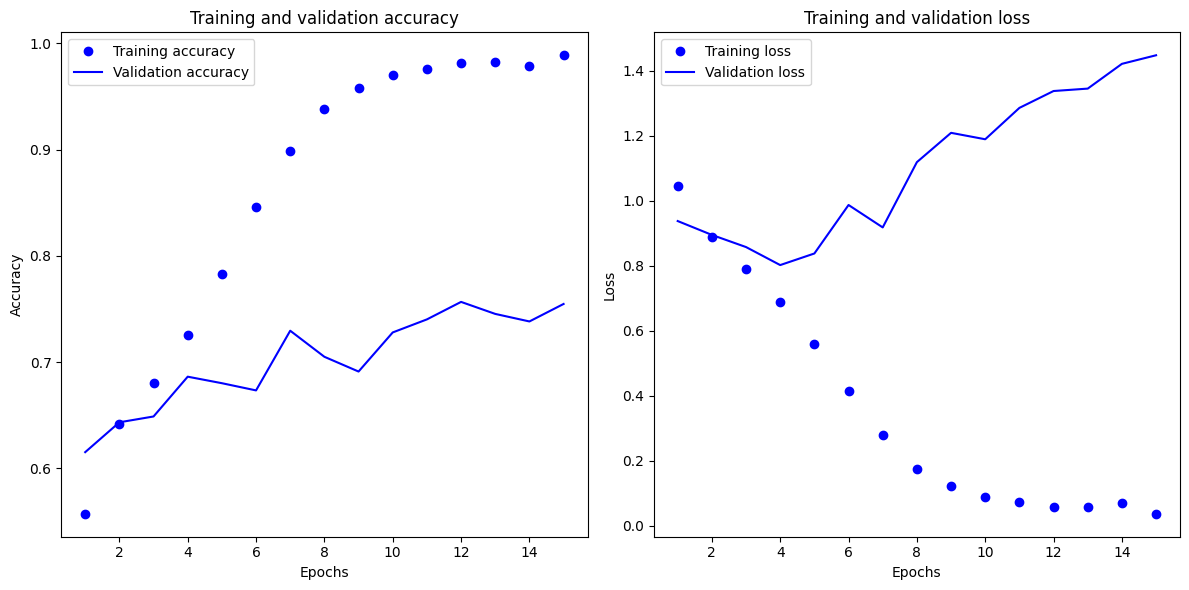

In [5]:
# 对数据预处理
def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (64, 64))
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]
    return image, label


train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(preprocess_image).shuffle(1000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(preprocess_image).batch(32)

# 训练模型
history = model.fit(train_ds, validation_data=test_ds, epochs=15)

# 绘制训练集和测试集的准确率和损失值曲线
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
